Detección de URL de **phishing**

Acerca del conjunto de datos
La creación de este conjunto de datos estuvo motivada por la aparente falta de un gran conjunto de datos etiquetados y/o herramientas de sandbox que permitan una fácil importación de muestras de URL para la detección de phishing.

Este conjunto de datos contiene alrededor de 2,5 millones de muestras de URL, etiquetadas como legítimas o de phishing, junto con 14 características relevantes en la detección de phishing a través de algoritmos de clasificación.



**ANALISIS** EXPLORATORIO DE DATOS

In [3]:
import pandas as pd
import sklearn
import seaborn as sns

In [18]:
df_phishing = pd.read_csv("out.csv")

df_phishing


,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,Phishing.Database,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,"{'domain_name': 'novoatend', 'registrar': None...",NaN
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,Phishing.Database,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,NaN,NaN
2499997,http://yonphweisdowedych.chaseonlinemarketing....,Phishing.Database,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,NaN,NaN
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,Phishing.Database,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,"{'domain_name': 'alternateangle.in', 'registra...",4622.0


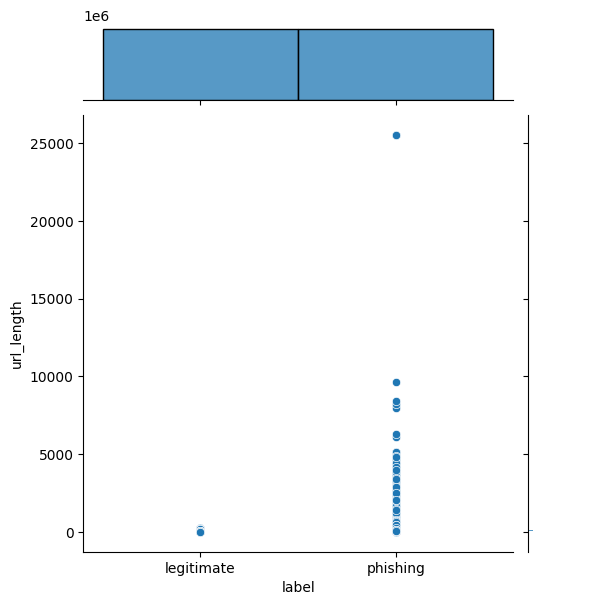

In [7]:
sns.jointplot(x="label", y="url_length", data=df_phishing)

In [11]:
from sklearn.model_selection import train_test_split

# Convertir la columna 'label' a numérica
df_phishing['label'] = pd.factorize(df_phishing['label'])[0]

# Extrayendo la información del dataset
X = df_phishing[["url_length"]]
y = df_phishing["label"]
# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(1875000, 1)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Particionando en dos conjuntos: _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

# Crear el modelo debemos hacerlo con regresion logistica
regressor = LinearRegression(fit_intercept=True)

# Entrenar el modelo con los datos
regressor.fit(X_train, y_train)

# Mostrar los parámetros del modelo
print(f"La pendiente del modelo (B) es: {regressor.coef_[0]}, el intercepto (A) es: {regressor.intercept_}")

(1875000, 1)
La pendiente del modelo (B) es: 0.0022726114875826877, el intercepto (A) es: 0.3955766508161587


Text(0.5, 1.0, 'Largo de la Url Vs si es o no PHISHING')

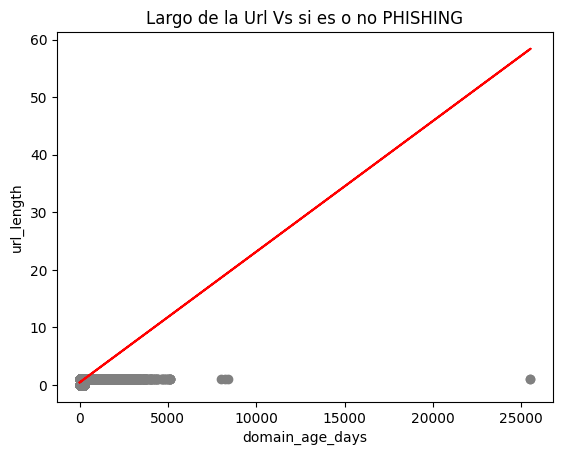

In [16]:
import matplotlib.pyplot as plt

y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('url_length')
plt.xlabel('domain_age_days')
plt.title('Largo de la Url Vs si es o no PHISHING')